In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation-models

import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
import segmentation_models as sm

import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

     |████████████████████████████████| 50 kB 6.6 MB/s 
Segmentation Models: using `keras` framework.


In [ ]:
from keras.metrics import MeanIoU

In [ ]:
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

In [ ]:
train_x_path = "/content/drive/MyDrive/Lung/Main dataset/train_original"
train_y_path ="/content/drive/MyDrive/Lung/Main dataset/train_mask"
test_x_path = "/content/drive/MyDrive/Lung/Main dataset/validation_original"
test_y_path = "/content/drive/MyDrive/Lung/Main dataset/validation_mask"

In [ ]:
def read_images(path, i=cv2.IMREAD_COLOR):
    images_array=[]
    for items in sorted(os.listdir(path)):
        img =  cv2.imread(os.path.join(path, items), i) #you can pass multiple arguments in single line
        img = cv2.resize(img,(256,256))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images_array.append(img)
    return np.array(images_array[:-1])

In [ ]:
train_x = read_images(train_x_path, i=cv2.IMREAD_COLOR)
print('trainx')
train_y = read_images(train_y_path,i=cv2.IMREAD_GRAYSCALE)
print('trainy')
test_x = read_images(test_x_path, i=cv2.IMREAD_COLOR)
print("testx")
test_y = read_images(test_y_path, i=cv2.IMREAD_GRAYSCALE)
print("testy")

trainx
trainy
testx
testy


In [ ]:
train_y = np.expand_dims(train_y, axis=3)
test_y = np.expand_dims(test_y, axis=3)

In [ ]:
print(np.shape(train_x[0]))
print(np.shape(train_y[0]))
print(np.shape(test_x[0]))
print(np.shape(test_y[0]))

(256, 256, 3)
(256, 256, 1)
(256, 256, 3)
(256, 256, 1)


In [ ]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

train_x = preprocess_input(train_x)
test_x = preprocess_input(test_x)
train_y = train_y.astype(np.float32)/255
test_y = test_y.astype(np.float32)/255

In [ ]:
model = sm.Unet(BACKBONE, input_shape=(256,256,3), encoder_weights='imagenet')
model.compile('Adam', loss='binary_crossentropy', metrics=['accuracy',MeanIoU(num_classes=2)])

model.summary()

85532672/85521592 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
___________________________

In [ ]:
#Dataset - 1 model training
history = model.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y),
    #callbacks=callbacks_list
)

Epoch 1/100
31/31 [==============================] - 67s 919ms/step - loss: 0.1946 - accuracy: 0.9343 - mean_io_u: 0.3733 - val_loss: 2.7204 - val_accuracy: 0.4281 - val_mean_io_u: 0.6604
Epoch 2/100
31/31 [==============================] - 23s 741ms/step - loss: 0.0681 - accuracy: 0.9775 - mean_io_u: 0.3733 - val_loss: 1.2856 - val_accuracy: 0.6292 - val_mean_io_u: 0.5538
Epoch 3/100
31/31 [==============================] - 23s 745ms/step - loss: 0.0571 - accuracy: 0.9789 - mean_io_u: 0.3733 - val_loss: 1.3350 - val_accuracy: 0.6825 - val_mean_io_u: 0.4646
Epoch 4/100
31/31 [==============================] - 23s 753ms/step - loss: 0.0513 - accuracy: 0.9801 - mean_io_u: 0.3733 - val_loss: 0.1689 - val_accuracy: 0.9442 - val_mean_io_u: 0.3768
Epoch 5/100
31/31 [==============================] - 23s 749ms/step - loss: 0.0495 - accuracy: 0.9801 - mean_io_u: 0.3733 - val_loss: 0.1033 - val_accuracy: 0.9636 - val_mean_io_u: 0.3768
Epoch 6/100
31/31 [==============================] - 23s 742

In [ ]:
model.save('/content/drive/MyDrive/Lung/lung_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


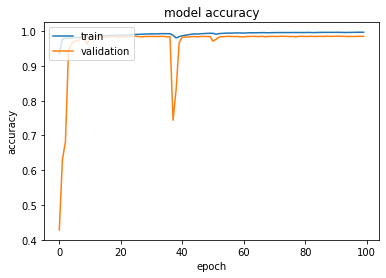

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

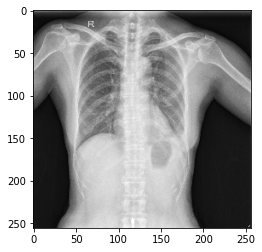

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Lung/Dataset - 2/test_image/CHNCXR_0380_1.png', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)

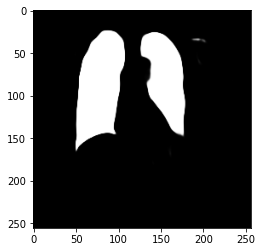

In [ ]:
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

# Dataset-2

In [ ]:
#Dataset - 1 model training
history = model.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y),
    #callbacks=callbacks_list
)

In [ ]:
train_x_path = "/content/drive/MyDrive/Lung/Dataset - 2/Train_original"
train_y_path ="/content/drive/MyDrive/Lung/Dataset - 2/Train_mask"
test_x_path = "/content/drive/MyDrive/Lung/Dataset - 2/Validation_original"
test_y_path = "/content/drive/MyDrive/Lung/Dataset - 2/Validation_mask"

In [ ]:
def read_images(path, i=cv2.IMREAD_COLOR):
    images_array=[]
    for items in sorted(os.listdir(path)):
        img =  cv2.imread(os.path.join(path, items), i) #you can pass multiple arguments in single line
        img = cv2.resize(img,(256,256))
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images_array.append(img)
    return np.array(images_array[:-1])

In [ ]:
train_x = read_images(train_x_path, i=cv2.IMREAD_COLOR)
train_y = read_images(train_y_path,i=cv2.IMREAD_GRAYSCALE)
test_x = read_images(test_x_path, i=cv2.IMREAD_COLOR)
test_y = read_images(test_y_path, i=cv2.IMREAD_GRAYSCALE)

KeyboardInterrupt: ignored

In [ ]:
train_y = np.expand_dims(train_y, axis=3)
test_y = np.expand_dims(test_y, axis=3)

In [ ]:
print(np.shape(train_x[0]))
print(np.shape(train_y[0]))
print(np.shape(test_x[0]))
print(np.shape(test_y[0]))

In [ ]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

train_x = preprocess_input(train_x)
test_x = preprocess_input(test_x)
train_y = train_y.astype(np.float32)/255
test_y = test_y.astype(np.float32)/255

In [ ]:
model = sm.Unet(BACKBONE, input_shape=(256,256,3), encoder_weights='imagenet')
model.compile(Adam(learning_rate=1e-4), loss=sm.losses.bce_jaccard_loss, metrics=['accuracy',MeanIoU(num_classes=2)],)

#model.summary()

In [ ]:
model2 = load_model('/content/drive/MyDrive/Lung/Dataset - 1/weights/dataset1.h5',
                    custom_objects= {'binary_crossentropy_plus_jaccard_loss': sm.losses.bce_jaccard_loss})
#model2.summary()

In [ ]:
history = model.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y),
    #callbacks=callbacks_list
)

In [ ]:
history2 = model2.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y)
    #callbacks=callbacks_list
)

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Lung/Dataset - 2/test_image/CHNCXR_0380_1.png', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)

In [ ]:
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

In [ ]:
#  "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Lung/Dataset - 2/test_image/CHNCXR_0380_1.png', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)
prediction = model2.predict(test_img)

In [ ]:
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')